# TODO: Title

This notebook lists all the steps that you need to complete the complete this project. You will need to complete all the TODOs in this notebook as well as in the README and the two python scripts included with the starter code.


**TODO**: Give a helpful introduction to what this notebook is for. Remember that comments, explanations and good documentation make your project informative and professional.

**Note:** This notebook has a bunch of code and markdown cells with TODOs that you have to complete. These are meant to be helpful guidelines for you to finish your project while meeting the requirements in the project rubrics. Feel free to change the order of these the TODO's and use more than one TODO code cell to do all your tasks.

In [2]:
# TODO: Install any packages that you might need
# For instance, you will need the smdebug package
!pip install smdebug

/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
  Using cached smdebug-1.0.12-py2.py3-none-any.whl (270 kB)
  Using cached pyinstrument-3.4.2-py2.py3-none-any.whl (83 kB)
  Using cached pyinstrument_cext-0.2.4-cp37-cp37m-manylinux2010_x86_64.whl (20 kB)
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.


In [3]:
# TODO: Import any packages that you might need
# For instance you will need Boto3 and Sagemaker
import sagemaker
import boto3

from sagemaker.session import Session
from sagemaker import get_execution_role

role=get_execution_role()
sagemaker_session=sagemaker.Session()
region=sagemaker_session.boto_region_name
bucket=sagemaker_session.default_bucket()

## Dataset
TODO: Explain what dataset you are using for this project. Maybe even give a small overview of the classes, class distributions etc that can help anyone not familiar with the dataset get a better understand of it.

In [4]:
#TODO: Fetch and upload the data to AWS S3

# Command to download and unzip data
!wget https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip
!unzip dogImages.zip

'!wget https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip\n!unzip dogImages.zip'

In [5]:
'''prefix = "dogImages"
inputs = sagemaker_session.upload_data(path="dogImages", bucket=bucket, key_prefix=prefix)'''

'prefix = "dogImages"\ninputs = sagemaker_session.upload_data(path="dogImages", bucket=bucket, key_prefix=prefix)'

In [6]:
inputs = 's3://sagemaker-us-east-1-189666338566/dogImages/'

## Hyperparameter Tuning
**TODO:** This is the part where you will finetune a pretrained model with hyperparameter tuning. Remember that you have to tune a minimum of two hyperparameters. However you are encouraged to tune more. You are also encouraged to explain why you chose to tune those particular hyperparameters and the ranges.

**Note:** You will need to use the `hpo.py` script to perform hyperparameter tuning.

In [7]:
#TODO: Declare your HP ranges, metrics etc.
from sagemaker.tuner import(
CategoricalParameter,
ContinuousParameter,
HyperparameterTuner,
IntegerParameter)

hyperparameter_ranges = {
    "lr": ContinuousParameter(0.0001, 0.1),
    "epochs": IntegerParameter(2, 4),
    "batch_size": CategoricalParameter([16, 32, 64, 128]),
}
objective_metric_name = "average test loss"
objective_type = "Minimize"
metric_definitions = [{"Name": "average test loss", "Regex": "Test set: Average loss: ([0-9\\.]+)"}]

In [8]:
#TODO: Create estimators for your HPs

from sagemaker.pytorch import PyTorch


estimator = PyTorch(
entry_point="hpo.py",
base_job_name="image_classification",
role=role,
instance_count=1,
instance_type = "ml.m5.large",
py_version = "py36",
framework_version = "1.8"
)

tuner = HyperparameterTuner(
estimator,
objective_metric_name,
hyperparameter_ranges,
metric_definitions,
max_jobs=4,
max_parallel_jobs=2,
objective_type=objective_type, 
early_stopping_type="Auto"
)

In [9]:
# TODO: Fit your HP Tuner
tuner.fit({"training":inputs},wait=True) # TODO: Remember to include your data channels

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [10]:
# TODO: Get the best estimators and the best HPs

best_estimator = tuner.best_estimator()

#Get the hyperparameters of the best trained model
best_estimator.hyperparameters()


2022-02-13 09:50:47 Starting - Preparing the instances for training
2022-02-13 09:50:47 Downloading - Downloading input data
2022-02-13 09:50:47 Training - Training image download completed. Training in progress.
2022-02-13 09:50:47 Uploading - Uploading generated training model
2022-02-13 09:50:47 Completed - Training job completed


{'_tuning_objective_metric': '"average test loss"',
 'batch_size': '"64"',
 'epochs': '3',
 'lr': '0.0002443437553814109',
 'sagemaker_container_log_level': '20',
 'sagemaker_estimator_class_name': '"PyTorch"',
 'sagemaker_estimator_module': '"sagemaker.pytorch.estimator"',
 'sagemaker_job_name': '"image_classification-2022-02-13-06-26-58-463"',
 'sagemaker_program': '"hpo.py"',
 'sagemaker_region': '"us-east-1"',
 'sagemaker_submit_directory': '"s3://sagemaker-us-east-1-189666338566/image_classification-2022-02-13-06-26-58-463/source/sourcedir.tar.gz"'}

In [15]:
best_para = {'_tuning_objective_metric': 'average test loss',
 'batch_size': '64',
 'epochs': '3',
 'lr': '0.0002443437553814109',
 'sagemaker_container_log_level': '20',
 'sagemaker_estimator_class_name': 'PyTorch',
 'sagemaker_estimator_module': 'sagemaker.pytorch.estimator',
 'sagemaker_job_name': 'image_classification-2022-02-13-06-26-58-463',
 'sagemaker_program': 'hpo.py',
 'sagemaker_region': 'us-east-1',
 'sagemaker_submit_directory': 's3://sagemaker-us-east-1-189666338566/image_classification-2022-02-13-06-26-58-463/source/sourcedir.tar.gz'}

## Model Profiling and Debugging
TODO: Using the best hyperparameters, create and finetune a new model

**Note:** You will need to use the `train_model.py` script to perform model profiling and debugging.

In [12]:
# TODO: Set up debugging and profiling rules and hooks
from sagemaker.debugger import Rule, ProfilerRule, rule_configs
from sagemaker.debugger import (
    DebuggerHookConfig,
    CollectionConfig,
    ProfilerConfig,
    FrameworkProfile
)

rules = [
    Rule.sagemaker(rule_configs.vanishing_gradient()),
    Rule.sagemaker(rule_configs.overfit()),
    Rule.sagemaker(rule_configs.overtraining()),
    Rule.sagemaker(rule_configs.poor_weight_initialization()),
    ProfilerRule.sagemaker(rule_configs.ProfilerReport()),
]

profiler_config=ProfilerConfig(
system_monitor_interval_millis=500,framework_profile_params=FrameworkProfile(num_steps=10))
debugger_config = DebuggerHookConfig(
    hook_parameters={"train.save_interval": "100", "eval.save_interval": "10"}
)

In [16]:
# TODO: Create and fit an estimator

estimator = PyTorch(
entry_point="train_model.py",
instance_count=1,
instance_type="ml.m5.large",
role=role,
framework_version="1.8", 
py_version="py36",
hyperparameters=best_para,
profiler_config=profiler_config,
debugger_hook_config=debugger_config, 
rules=rules
)

estimator.fit({'train' : inputs },wait=True)

2022-02-13 12:39:13 Starting - Starting the training job...
2022-02-13 12:39:41 Starting - Launching requested ML instancesVanishingGradient: InProgress
Overfit: InProgress
Overtraining: InProgress
PoorWeightInitialization: InProgress
ProfilerReport: InProgress
......
2022-02-13 12:40:42 Starting - Preparing the instances for training.........
2022-02-13 12:42:02 Downloading - Downloading input data.........
2022-02-13 12:43:43 Training - Downloading the training image..bash: cannot set terminal process group (-1): Inappropriate ioctl for device
bash: no job control in this shell
2022-02-13 12:43:49,820 sagemaker-training-toolkit INFO     Imported framework sagemaker_pytorch_container.training
2022-02-13 12:43:49,822 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
2022-02-13 12:43:49,832 sagemaker_pytorch_container.training INFO     Block until all host DNS lookups succeed.
2022-02-13 12:43:56,079 sagemaker_pytorch_container.training INFO     Invoking

In [18]:
from smdebug.trials import create_trial
from smdebug.core.modes import ModeKeys

trial = create_trial(estimator.latest_job_debugger_artifacts_path())

print(trial.tensor_names())
print(len(trial.tensor('CrossEntropyLoss_output_0').steps(mode=ModeKeys.TRAIN)))
print(len(trial.tensor('CrossEntropyLoss_output_0').steps(mode=ModeKeys.EVAL)))

[2022-02-13 14:31:37.226 datascience-1-0-ml-t3-medium-1abf3407f667f989be9d86559395:48 INFO utils.py:27] RULE_JOB_STOP_SIGNAL_FILENAME: None
[2022-02-13 14:31:37.256 datascience-1-0-ml-t3-medium-1abf3407f667f989be9d86559395:48 INFO s3_trial.py:42] Loading trial debug-output at path s3://sagemaker-us-east-1-189666338566/pytorch-training-2022-02-13-12-39-12-724/debug-output
[2022-02-13 14:31:38.099 datascience-1-0-ml-t3-medium-1abf3407f667f989be9d86559395:48 INFO trial.py:198] Training has ended, will refresh one final time in 1 sec.
[2022-02-13 14:31:39.118 datascience-1-0-ml-t3-medium-1abf3407f667f989be9d86559395:48 INFO trial.py:210] Loaded all steps
['CrossEntropyLoss_output_0', 'gradient/ResNet_fc.bias', 'gradient/ResNet_fc.weight', 'layer1.0.relu_input_0', 'layer1.0.relu_input_1', 'layer1.0.relu_input_2', 'layer1.1.relu_input_0', 'layer1.1.relu_input_1', 'layer1.1.relu_input_2', 'layer1.2.relu_input_0', 'layer1.2.relu_input_1', 'layer1.2.relu_input_2', 'layer2.0.relu_input_0', 'laye

In [19]:
def get_data(trial, tname, mode):
    tensor = trial.tensor(tname)
    steps = tensor.steps(mode=mode)
    vals = []
    for s in steps:
        vals.append(tensor.value(s, mode=mode))
    return steps, vals

In [20]:
# TODO: Plot a debugging output.

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import host_subplot


def plot_tensor(trial, tensor_name):
    steps_train, vals_train = get_data(trial, tensor_name, mode=ModeKeys.TRAIN)
    print("loaded TRAIN data")
    steps_eval, vals_eval = get_data(trial, tensor_name, mode=ModeKeys.EVAL)
    print("loaded EVAL data")

    fig = plt.figure(figsize=(10, 7))
    host = host_subplot(111)

    par = host.twiny()

    host.set_xlabel("Steps (TRAIN)")
    par.set_xlabel("Steps (EVAL)")
    host.set_ylabel(tensor_name)

    (p1,) = host.plot(steps_train, vals_train, label=tensor_name)
    print("completed TRAIN plot")
    (p2,) = par.plot(steps_eval, vals_eval, label="val_" + tensor_name)
    print("completed EVAL plot")
    leg = plt.legend()

    host.xaxis.get_label().set_color(p1.get_color())
    leg.texts[0].set_color(p1.get_color())

    par.xaxis.get_label().set_color(p2.get_color())
    leg.texts[1].set_color(p2.get_color())

    plt.ylabel(tensor_name)

    plt.show()

**TODO**: Is there some anomalous behaviour in your debugging output? If so, what is the error and how will you fix it?  
**TODO**: If not, suppose there was an error. What would that error look like and how would you have fixed it?

loaded TRAIN data
loaded EVAL data
completed TRAIN plot
completed EVAL plot


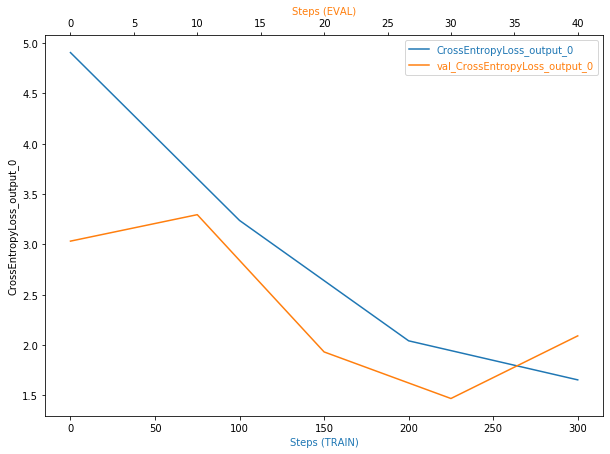

In [21]:
# TODO: Display the profiler output
plot_tensor(trial, "CrossEntropyLoss_output_0")

In [22]:
rule_output_path = estimator.output_path + estimator.latest_training_job.job_name + "/rule-output"

In [23]:
! aws s3 ls {rule_output_path} --recursive
! aws s3 cp {rule_output_path} ./ --recursive



2022-02-13 14:29:37     374708 pytorch-training-2022-02-13-12-39-12-724/rule-output/ProfilerReport/profiler-output/profiler-report.html
2022-02-13 14:29:36     222620 pytorch-training-2022-02-13-12-39-12-724/rule-output/ProfilerReport/profiler-output/profiler-report.ipynb
2022-02-13 14:29:31        193 pytorch-training-2022-02-13-12-39-12-724/rule-output/ProfilerReport/profiler-output/profiler-reports/BatchSize.json
2022-02-13 14:29:31        201 pytorch-training-2022-02-13-12-39-12-724/rule-output/ProfilerReport/profiler-output/profiler-reports/CPUBottleneck.json
2022-02-13 14:29:31       1908 pytorch-training-2022-02-13-12-39-12-724/rule-output/ProfilerReport/profiler-output/profiler-reports/Dataloader.json
2022-02-13 14:29:31        127 pytorch-training-2022-02-13-12-39-12-724/rule-output/ProfilerReport/profiler-output/profiler-reports/GPUMemoryIncrease.json
2022-02-13 14:29:32        200 pytorch-training-2022-02-13-12-39-12-724/rule-output/ProfilerReport/profiler-output/profiler-re

In [24]:
import IPython

profiler_report_name = [
    rule["RuleConfigurationName"]
    for rule in estimator.latest_training_job.rule_job_summary()
    if "Profiler" in rule["RuleConfigurationName"]
][0]

IPython.display.HTML(filename=profiler_report_name + "/profiler-output/profiler-report.html")

## Model Deploying

In [25]:
testdog = "./dogImages/test/001.Affenpinscher/Affenpinscher_00003.jpg"
with open(testdog, "rb") as f:
    payload = f.read()


In [26]:
!pip install torch
!pip install torchvision
!pip install smdebug

/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Killed
/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
  Using cached torchvision-0.11.3-cp37-cp37m-manylinux1_x86_64.whl (23.2 MB)
Killed
/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationW

In [37]:
model_data = estimator.output_path + estimator.latest_training_job.job_name + "/output/model.tar.gz"

from sagemaker.pytorch import PyTorchModel
from sagemaker.predictor import Predictor
jpeg_serializer = sagemaker.serializers.IdentitySerializer("image/jpeg")
json_deserializer = sagemaker.deserializers.JSONDeserializer()

class ImgPredictor(Predictor):
    def __init__( self, endpoint_name, sagemaker_session):
        super( ImgPredictor, self).__init__(
            endpoint_name,
            sagemaker_session = sagemaker_session,
            serializer = jpeg_serializer,
            deserializer = json_deserializer
        )
        
pytorch_model = PyTorchModel( model_data = model_data,
                            role = role,
                            entry_point= "inference.py",
                            py_version = "py36",
                            framework_version = "1.8",
                             predictor_cls = ImgPredictor
                            )

predictor = pytorch_model.deploy( initial_instance_count = 1, instance_type = "ml.m5.large")

------!

Test image no: 1
Below is the image that we will be testing:


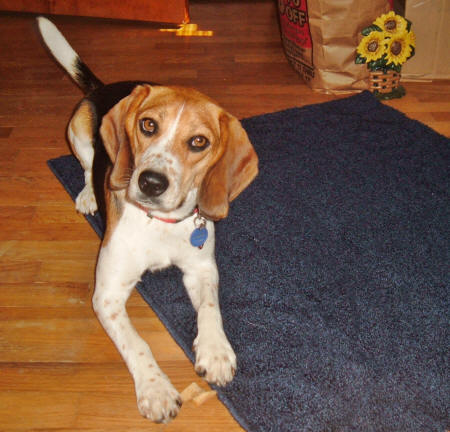

Expected dog breed number: 16


ModelError: An error occurred (ModelError) when calling the InvokeEndpoint operation: Received server error (0) from primary with message "Your invocation timed out while waiting for a response from container primary. Review the latency metrics for each container in Amazon CloudWatch, resolve the issue, and try again.". See https://us-east-1.console.aws.amazon.com/cloudwatch/home?region=us-east-1#logEventViewer:group=/aws/sagemaker/Endpoints/pytorch-inference-2022-02-13-15-32-52-073 in account 189666338566 for more information.

In [38]:
from PIL import Image
import io
import os
import numpy as np

test_dir = "./dogImages/test/"
test_images = [ "016.Beagle/Beagle_01130.jpg", '011.Australian_cattle_dog/Australian_cattle_dog_00727.jpg', '025.Black_and_tan_coonhound/Black_and_tan_coonhound_01789.jpg' ]
test_images_expected_output = [16, 11, 25]
for index in range(len(test_images) ):
    test_img = test_images[index]
    expected_breed_category = test_images_expected_output[index]
    print(f"Test image no: {index+1}")
    test_file_path = os.path.join(test_dir,test_img)
    with open(test_file_path , "rb") as f:
        payload = f.read()
        print("Below is the image that we will be testing:")
        display(Image.open(io.BytesIO(payload)))
        print(f"Expected dog breed number: {expected_breed_category}")
        response = predictor.predict(payload, initial_args={"ContentType": "image/jpeg"})
        print(f"Response: {response}")
        predicted_dog_breed = np.argmax(response,1) + 1 #index starts in 0 and breeds start in 1
        print(f"Response/Inference for the above image is : {predicted_dog_breed}")

In [36]:
# TODO: Remember to shutdown/delete your endpoint once your work is done
predictor.delete_endpoint()